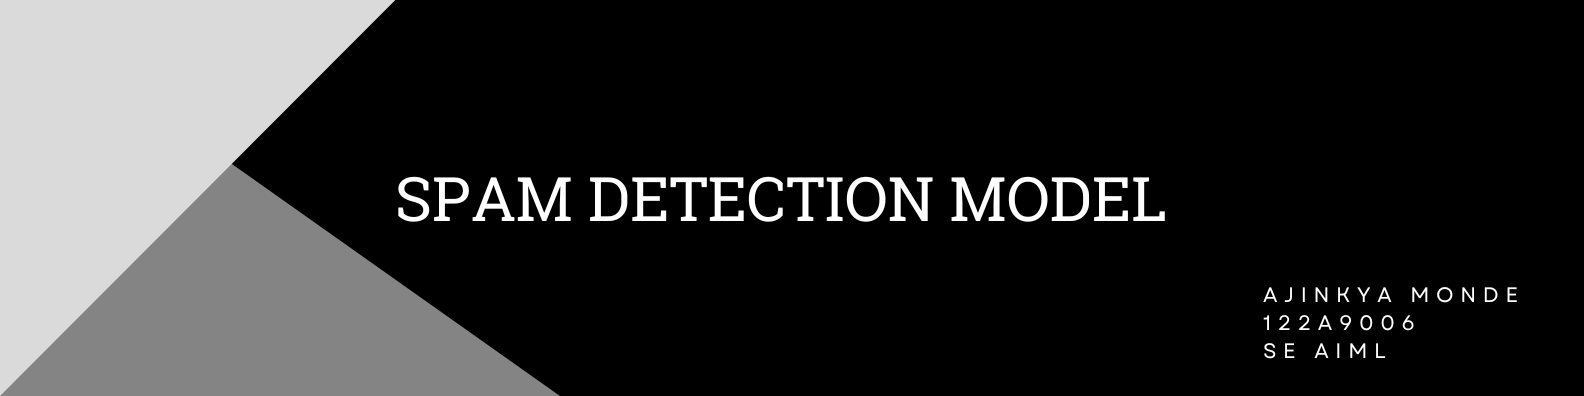

In [70]:
from IPython.display import Image
Image("spamm.png")

In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [16]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [17]:
df.shape

(5169, 2)

In [18]:
# drop last 3 columns; which are not usefull
df = df[["v1","v2"]]

In [20]:
# rename columns names
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
# label encoding target column
df["target"] = df["target"].map({"ham":0, "spam":1})

In [22]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [23]:
# checking null values exist in dataframe
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
# checking duplicated rows or records in dataframe
df.duplicated().sum()

0

In [25]:
# There are 403 duplicated rows in dataframe, so remove duplicates
df.drop_duplicates(inplace=True, keep="first")

In [26]:
df.shape

(5169, 2)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

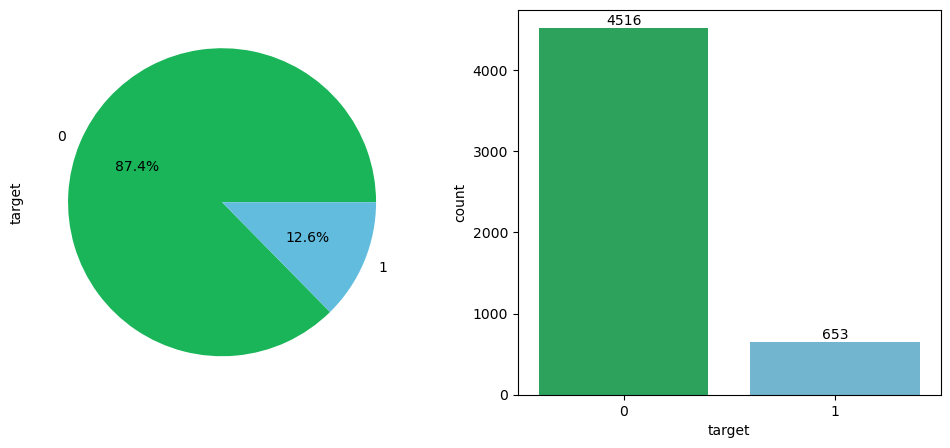

In [28]:
# ploting target column
figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

custom_colors = ["#19b558", "#62bcde"]
df["target"].value_counts().plot(kind="pie", autopct="%.1f%%", colors = custom_colors, ax=ax1)
fig = sns.countplot(x=df["target"], palette=custom_colors, ax=ax2)
for bar in fig.containers:
    fig.bar_label(bar)

plt.show()

In [ ]:
# From the above plot, we can see that 1(spam) category is very minimum as compared to 0(ham) category. It shows data is imbalanced.

In [29]:
# number of characters
df["num_characters"] = df["text"].apply(len)

In [30]:
# number of words
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))


In [31]:
# number of sentences
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [32]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [33]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham emails/messages
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# spam emails/messages
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


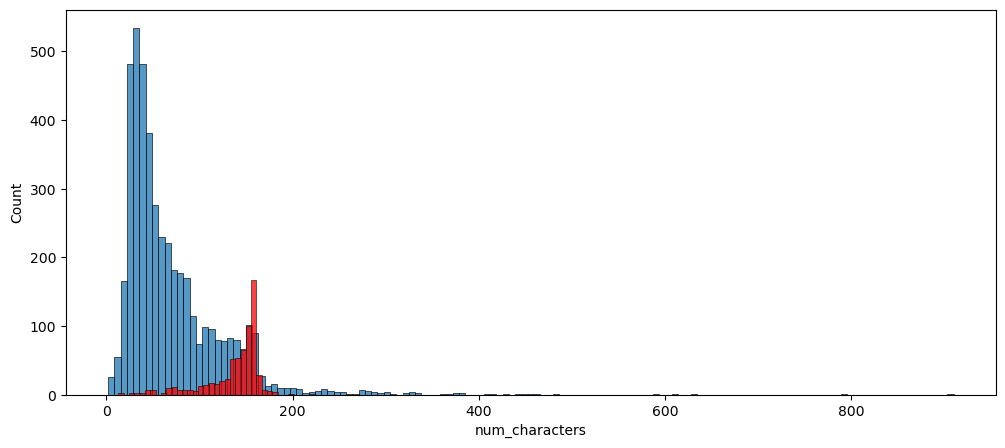

In [36]:
# ploting: number of characters in spam and ham emails
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"], color="red")
plt.show()

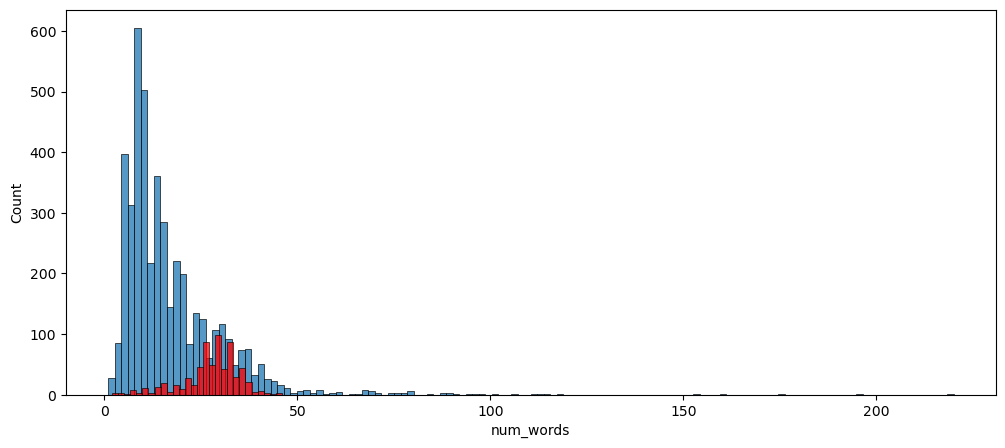

In [37]:
# ploting: number of words in spam and ham emails
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color="red")
plt.show()

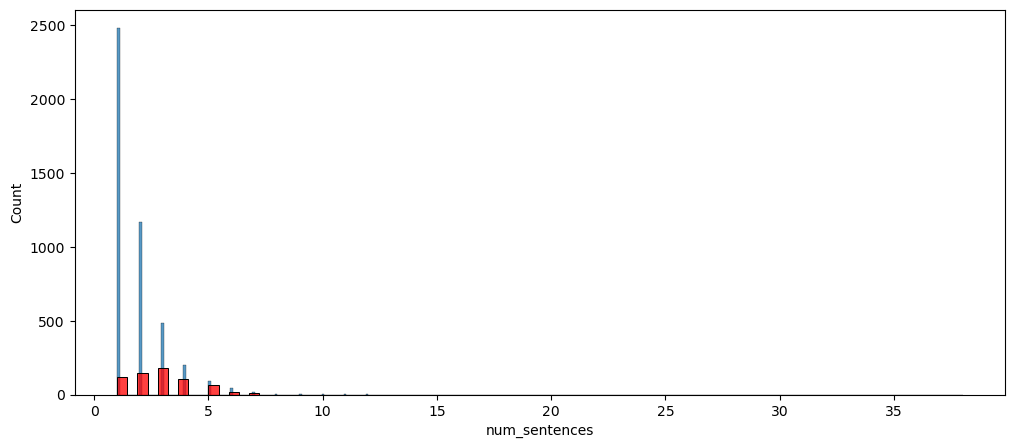

In [38]:

# ploting: number of sentences in spam and ham emails
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"], color="red")
plt.show()

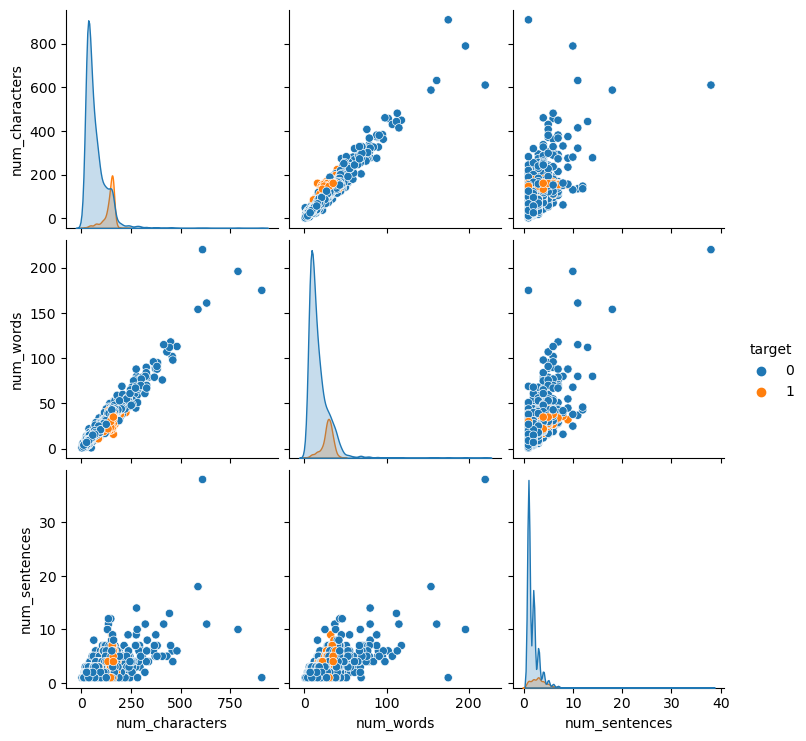

In [39]:
# ploting pairplot to see relationship between new columns
sns.pairplot(df, hue="target")

<Axes: >

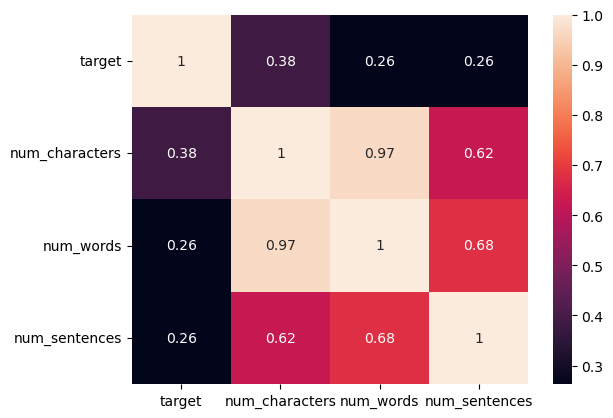

In [40]:
# correlation heatmap
sns.heatmap(df.select_dtypes(["int"]).corr(), annot=True)

In [ ]:
# New columns such as number of characters, words and sentences have strong relationship between them that shows there is High Multicollinearity between these columns. So, we will not use these columns or features in Model Training but will perform analysis through these features.

In [41]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [42]:
def transform_text(text):
    # 01: transforming text into lower case
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # 02: getting alphnumeric content from text
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)
    
    # 03: removing stop words and punction marks from text
    text = y[:]
    y.clear()
    for word in text:
        if word not in stopwords.words("english") and word not in string.punctuation:
            y.append(word)
            
    # 04: apply stemming 
    text = y[:]
    y.clear()
    for word in text:
        y.append(PorterStemmer().stem(word))
    
    return " ".join(y)

In [43]:
# testing the function
transform_text("ALi is goods goods how where boy's# ;$# ... >>(a)// !")

'ali good good boy'

In [46]:
df["transformed_text"] = df["text"].apply(transform_text)

In [47]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [48]:
# Performing analysis on ham and spam emails separately to see common and repeating words through Word Cloud
from wordcloud import WordCloud

wc = WordCloud(width=600, height=500, min_font_size=12, background_color="white")

In [49]:
# for ham emails/messages
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

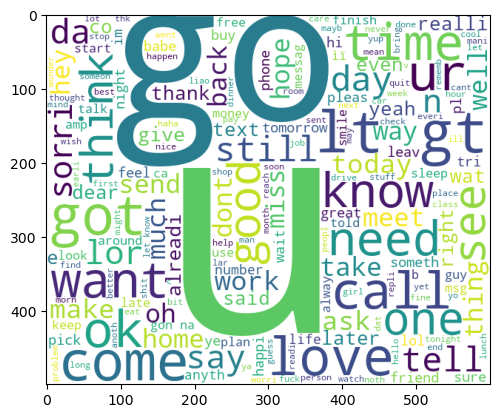

In [50]:
plt.imshow(ham_wc)

In [51]:
# for spam emails/messages
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

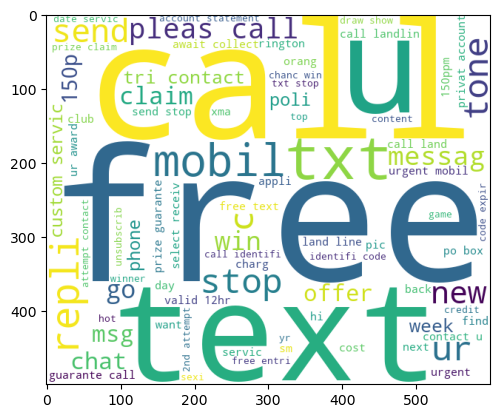

In [52]:
plt.imshow(spam_wc)

In [53]:
# ploting top repeated words
from collections import Counter

In [54]:
def top_words(target):
    words = []
    for msg in df[df["target"] == target]["transformed_text"].tolist():
        for word in msg.split():
            words.append(word)
            
    sns.barplot(x=pd.DataFrame(Counter(words).most_common(30))[0], y=pd.DataFrame(Counter(words).most_common(30))[1])
    plt.xticks(rotation="vertical")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

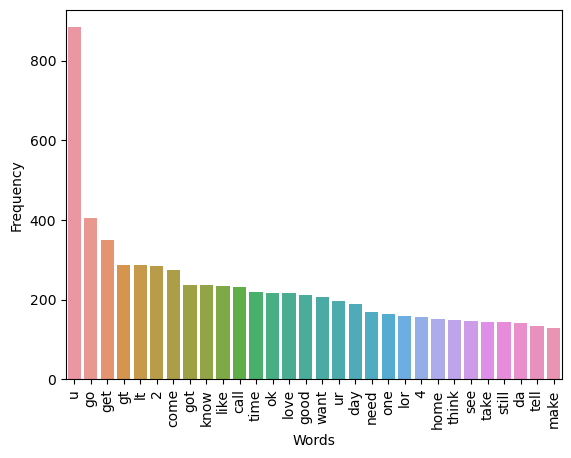

In [55]:
top_words(0)

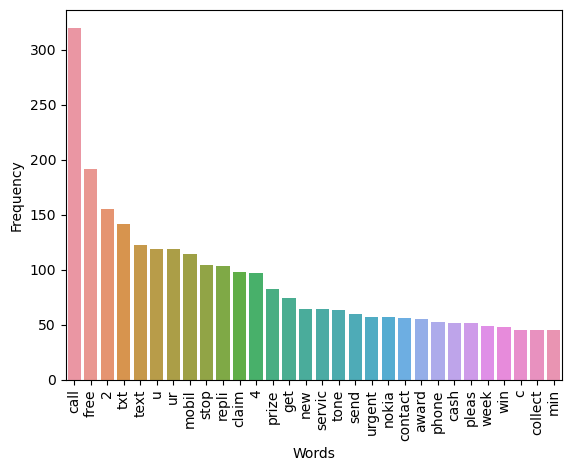

In [56]:
top_words(1)

# Model Building 

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [58]:
# Using TF-IDF vectorizer
tf_idf = TfidfVectorizer(max_features=3500)

In [59]:
x = tf_idf.fit_transform(df["transformed_text"]).toarray()

In [60]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
y = df["target"].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [63]:
x.shape, y.shape

((5169, 3500), (5169,))

In [64]:
# splitting data into training and testing
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [66]:
# importing algorithms
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
#After applying various algos i concluded that only Naive Bayes algorithm was performing well.

In [ ]:
#using Naive Bayes Algorithm

In [67]:
for model in [GaussianNB(), MultinomialNB(), BernoulliNB()]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{model}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(f"Precision Score: {precision_score(y_test, y_pred)}")
    print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred)}")
    print("\n===================\n")
    

GaussianNB()
Accuracy Score: 0.8713733075435203
Precision Score: 0.5336134453781513
Confusion Matrix : 
[[774 111]
 [ 22 127]]


MultinomialNB()
Accuracy Score: 0.9642166344294004
Precision Score: 1.0
Confusion Matrix : 
[[885   0]
 [ 37 112]]


BernoulliNB()
Accuracy Score: 0.9748549323017408
Precision Score: 1.0
Confusion Matrix : 
[[885   0]
 [ 26 123]]




In [ ]:
# From Naive Bayes algorithms, only MultinomialNB() algorithm performs well.

In [68]:
# test selected model accuracy
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9642166344294004
1.0


In [ ]:
#pickle file

In [69]:

import pickle
pickle.dump(tf_idf, open("vectorizer.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))